Accuracy: 0.8156424581005587
Confusion Matrix:
[[92 13]
 [20 54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



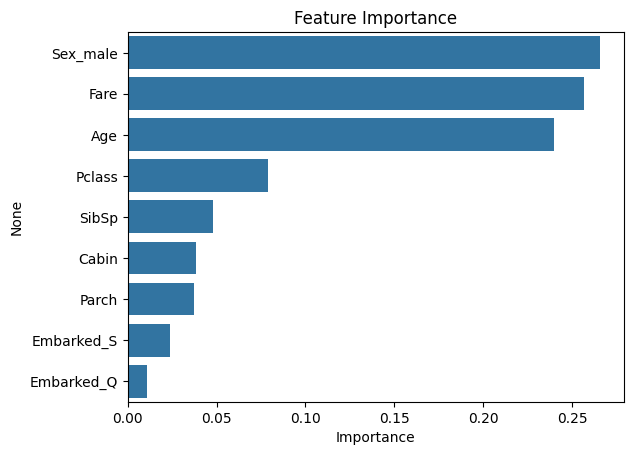

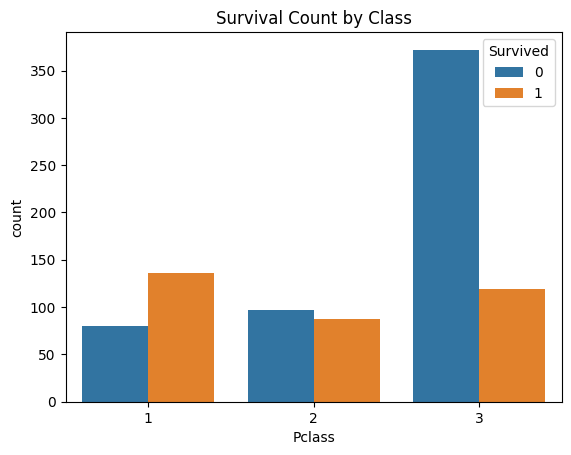

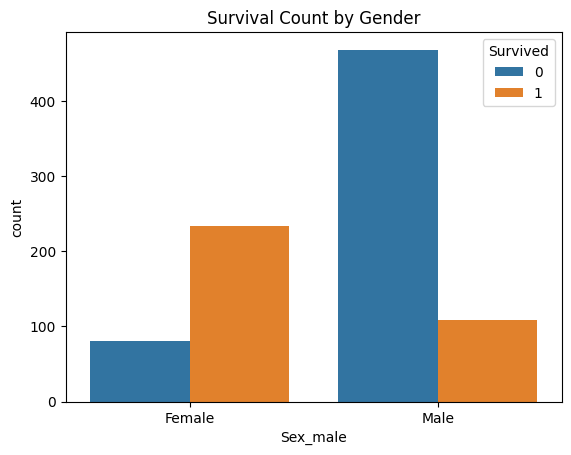

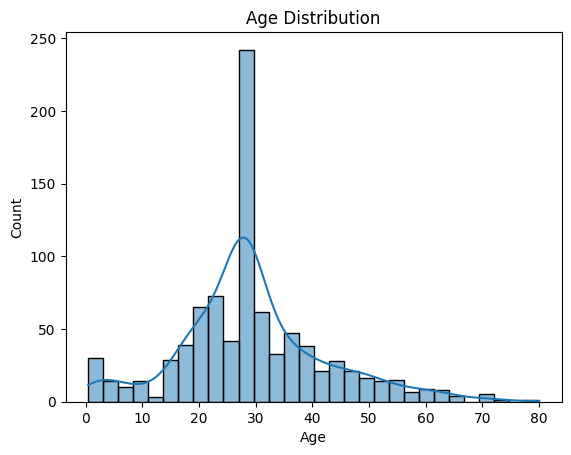

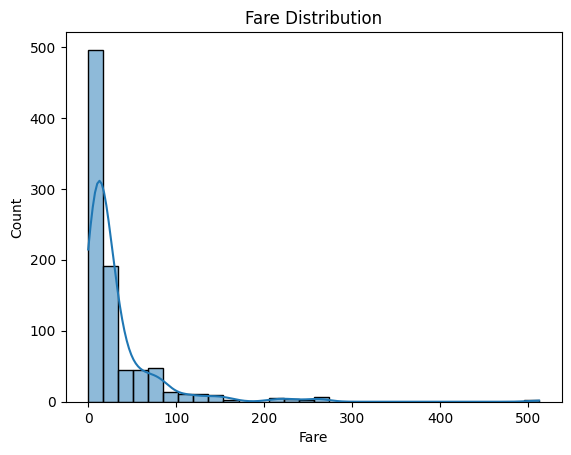

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic = pd.read_csv(url)

# Data preprocessing
titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic['Cabin'] = titanic['Cabin'].notnull().astype(int)
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'], drop_first=True)

# Splitting the dataset into features and target variable
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Feature importance visualization
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
sns.barplot(x=feature_importances.Importance, y=feature_importances.index)
plt.title('Feature Importance')
plt.show()

# Survival rate by class
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Survival Count by Class')
plt.show()

# Survival rate by gender
sns.countplot(x='Sex_male', hue='Survived', data=titanic)
plt.title('Survival Count by Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

# Age distribution
sns.histplot(titanic['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Fare distribution
sns.histplot(titanic['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()